In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('/content/Python Data.xlsx')

1. How many unique students are included in the dataset?

In [31]:
unique_students = df['First Name'].nunique()
print("Number of unique students:", unique_students)


Number of unique students: 2324


2. What is the average GPA of the students?

In [32]:
average_gpa = df['CGPA'].mean()
print("Average CGPA of students:", round(average_gpa, 2))

Average CGPA of students: 8.04


3. What is the distribution of students across different graduation years?

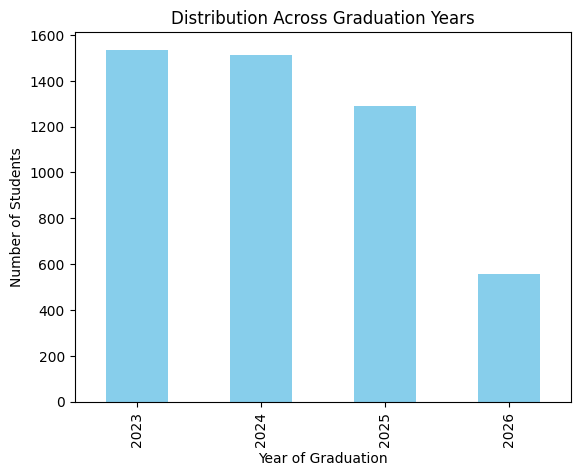

In [ ]:
df['Year of Graduation'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Distribution Across Graduation Years")
plt.xlabel("Year of Graduation")
plt.ylabel("Number of Students")
plt.show()

4. What is the distribution of students’ experience with Python programming?

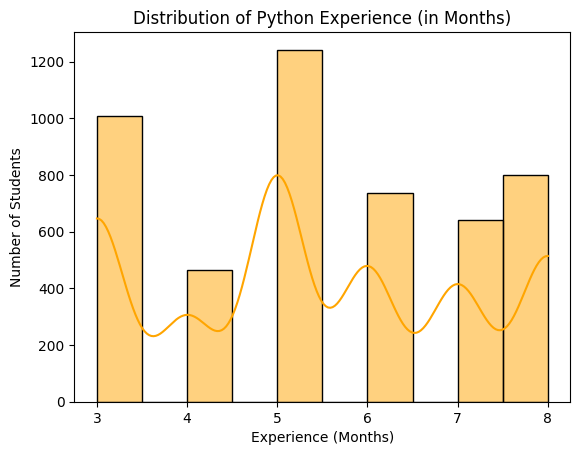

In [ ]:
sns.histplot(df['Experience with python (Months)'], bins=10, kde=True, color='orange')
plt.title("Distribution of Python Experience (in Months)")
plt.xlabel("Experience (Months)")
plt.ylabel("Number of Students")
plt.show()

5. What is the average family income of the student?

In [ ]:
income_map = {
    '0-2 Lakh': 1,
    '2-5 Lakh': 3.5,
    '5-7 Lakh': 6,
    '7 Lakh+': 8
}

df['Family Income (Numeric)'] = df['Family Income'].map(income_map)


avg_income = df['Family Income (Numeric)'].mean()
print("Average Family Income (Lakhs):", round(avg_income, 2))

Average Family Income (Lakhs): 1.31


6. How does the CGPA vary among different colleges? (Top 5 results only)

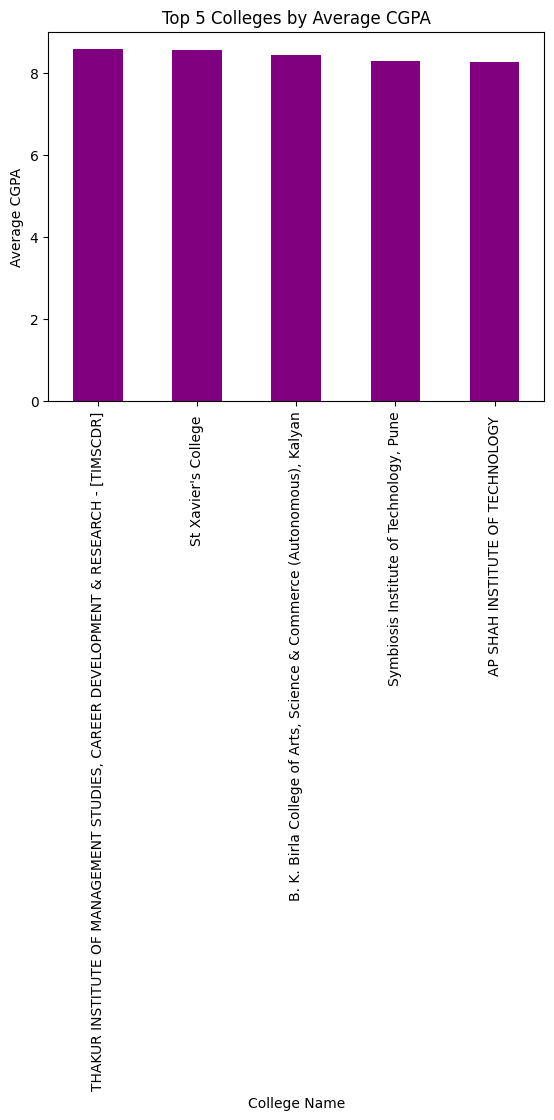

In [ ]:
df.groupby('College Name')['CGPA'].mean().sort_values(ascending=False).head(5).plot(kind='bar', color='purple')
plt.title("Top 5 Colleges by Average CGPA")
plt.ylabel("Average CGPA")
plt.show()

7. Are there any outliers in ‘Attendee Status’ & ‘Quantity (number of courses completed)’ attribute?

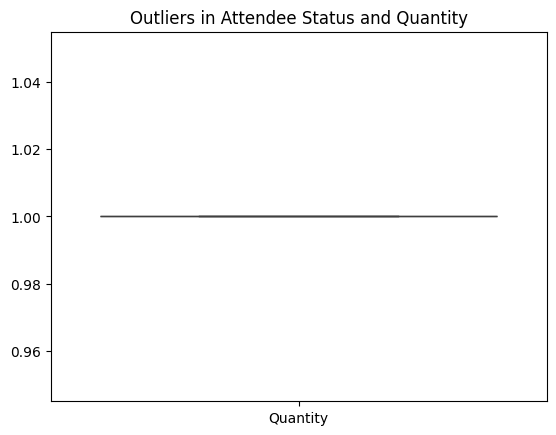

In [ ]:
sns.boxplot(data=df[['Attendee Status', 'Quantity']])
plt.title("Outliers in Attendee Status and Quantity")
plt.show()

8. What is the average CGPA for students from each city?

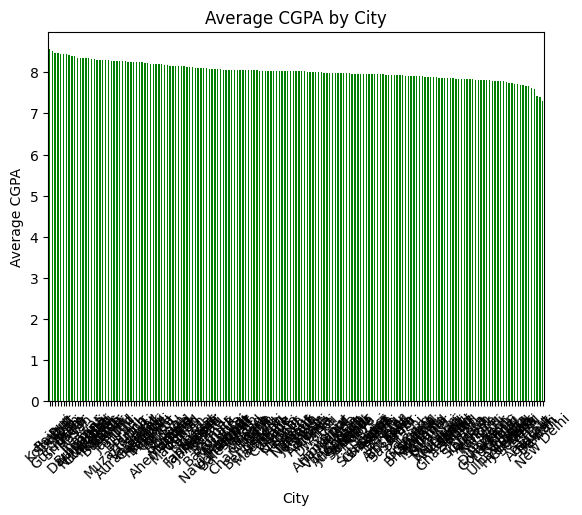

In [ ]:
df.groupby('City')['CGPA'].mean().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title("Average CGPA by City")
plt.ylabel("Average CGPA")
plt.xticks(rotation=45)
plt.show()

9. Can we identify any relationship between family income and CGPA?

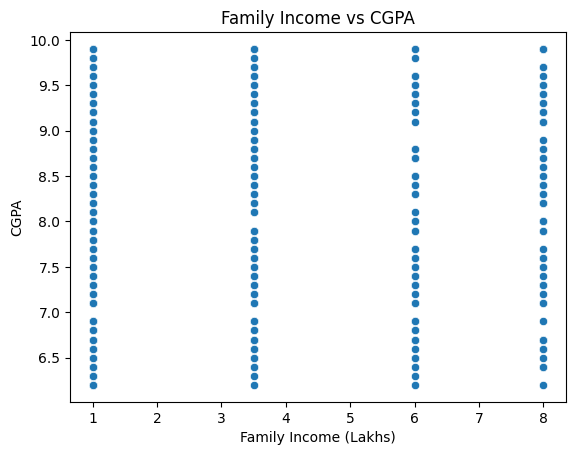

Correlation between Family Income and CGPA: 0.02


In [ ]:
sns.scatterplot(data=df, x='Family Income (Numeric)', y='CGPA')
plt.title("Family Income vs CGPA")
plt.xlabel("Family Income (Lakhs)")
plt.ylabel("CGPA")
plt.show()

correlation = df['Family Income (Numeric)'].corr(df['CGPA'])
print("Correlation between Family Income and CGPA:", round(correlation, 2))

10. How does the expected salary vary based on factors like ‘CGPA’, ‘Family income’, ‘Experience with python (Months)’?

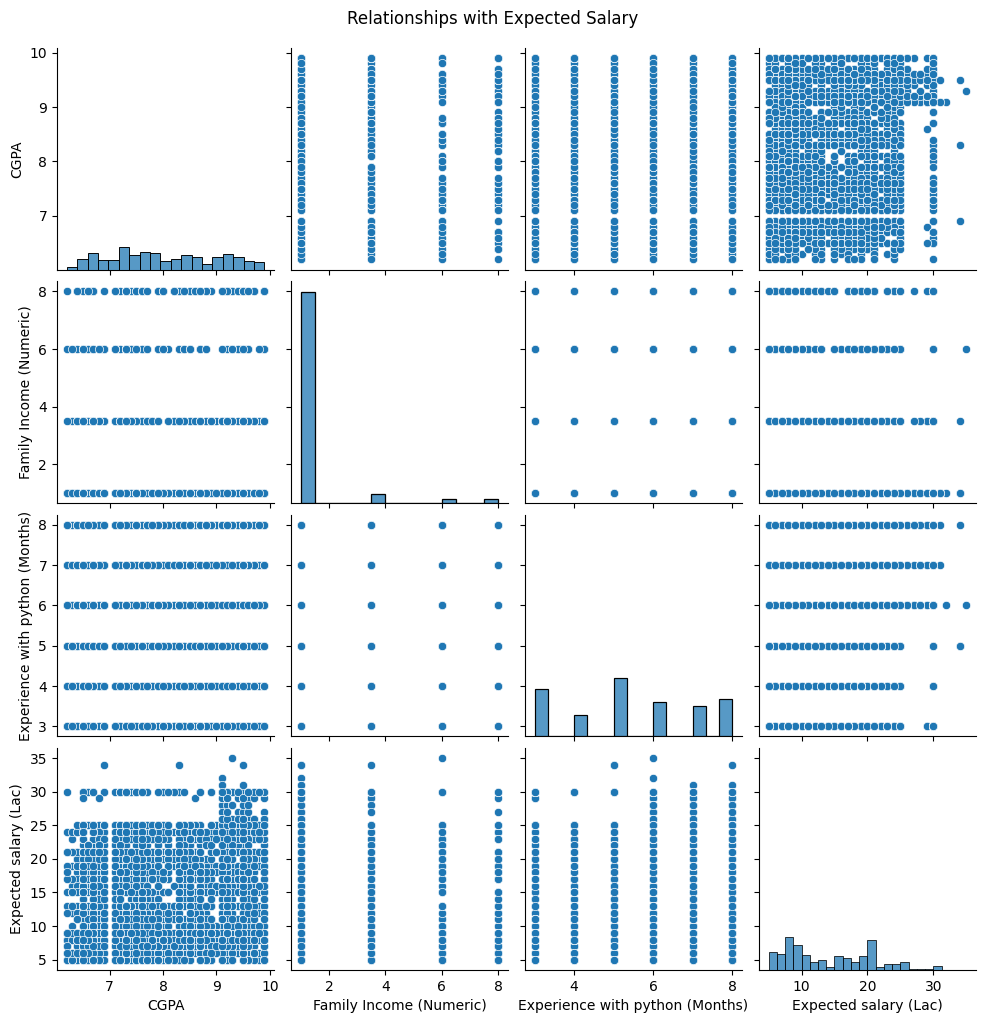

In [ ]:
sns.pairplot(df, vars=['CGPA', 'Family Income (Numeric)', 'Experience with python (Months)', 'Expected salary (Lac)'])
plt.suptitle("Relationships with Expected Salary", y=1.02)
plt.show()


11. Which event tend to attract more students from specific fields of study?
(Assuming "Designation" refers to field of study)

In [ ]:
df.groupby(['Designation', 'Events']).size().unstack().fillna(0).idxmax(axis=1)


,0
Designation,
Administrative Officer,Internship Program(IP) Success Conclave
Aerospace engineer,Internship Program(IP) Success Conclave
Artificial intelligence,Internship Program(IP) Success Conclave
Asst. Professor,IAC - Q&A
B Sc IT,Internship Program(IP) Success Conclave
B.Tech,Internship Program(IP) Success Conclave
BE,Internship Program(IP) Success Conclave
BE CS,Internship Program(IP) Success Conclave
BE IT,Internship Program(IP) Success Conclave


12. Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?

In [ ]:
df.groupby('Leadership- skills')[['CGPA', 'Expected salary (Lac)']].mean()


,CGPA,Expected salary (Lac)
Leadership- skills,,
no,8.040444,13.795098
no,8.034816,14.407975
yes,8.036787,13.971796


13.Is there a correlation between leadership skills and expected salary of the students?

In [ ]:
df['Leadership Binary'] = df['Leadership- skills'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)
correlation = df['Leadership Binary'].corr(df['Expected salary (Lac)'])
print("Correlation between leadership and salary:", round(correlation, 2))


Correlation between leadership and salary: 0.0


14. How many students are graduating by the end of 2024?

In [ ]:
students_2024 = df[df['Year of Graduation'] <= 2024]
print("Number of students graduating by end of 2024:", students_2024.shape[0])


Number of students graduating by end of 2024: 3047


15. Which promotion channel brings in more student participation for the event?

In [ ]:
df['How did you come to know about this event?'].value_counts()


,count
How did you come to know about this event?,
Whatsapp,1067
Email,438
SPOC/ College Professor,326
Others,153
Cloud Counselage Website,129
...,...
Others | SPOC/ College Professor,1
Youtube | Facebook | Whatsapp,1
LinkedIn | Whatsapp | Cloud Counselage Website,1


16. Find the total number of students who attended events related to Data Science?
(Filter by 'Events' column if it includes keywords like "Data Science").

In [ ]:
ds_students = df[df['Events'].str.contains('data science', case=False, na=False)]
print("Total students in Data Science events:", ds_students.shape[0])


Total students in Data Science events: 306


17. Those who have high CGPA & more experience in language who had high expectations for salary (Avg)?
(We define "high" as above average)

In [ ]:
high_cgpa = df['CGPA'] > df['CGPA'].mean()
high_exp = df['Experience with python (Months)'] > df['Experience with python (Months)'].mean()

filtered_df = df[high_cgpa & high_exp]
avg_salary = filtered_df['Expected salary (Lac)'].mean()
print("Average expected salary (high CGPA + high Python experience):", round(avg_salary, 2))


Average expected salary (high CGPA + high Python experience): 16.92


18. How many students know about the event from their colleges? Which of these Top 5 colleges?

In [ ]:
college_ref = df[df['How did you come to know about this event?'].str.contains('college', case=False, na=False)]
top5_colleges = college_ref['College Name'].value_counts().head(5)
print(top5_colleges)


College Name
kle society's college of bca, rls institute, belagavi    23
vidyalankar institute of technology, mumbai              23
mit academy of engineering ,alandi                       23
ld college of engineering, ahmedabad, gujarat            20
priyadarshini college of engineering, nagpur             20
Name: count, dtype: int64
